iris.data shape:(150, 4)
X_pca shape:(150, 2)


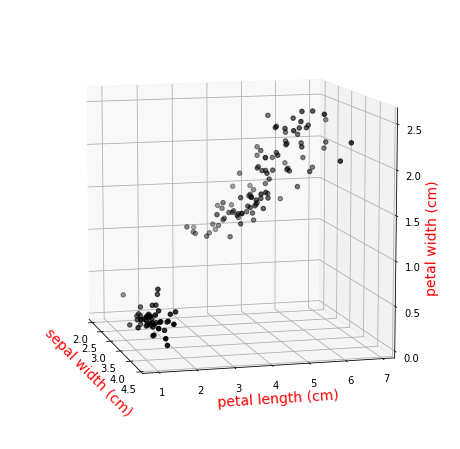

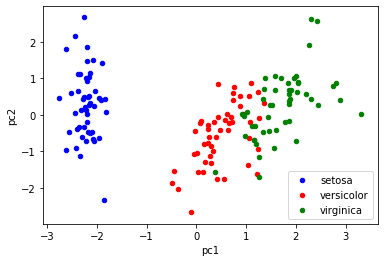

In [22]:
#AI-TECHGYM-1-6-Q-1
#教師なし学習 PCA

#データ加工・処理・分析ライブラリ
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#インポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#乳がんデータを読み込むためのインポート
from sklearn.datasets import load_iris

#乳がんデータの取得
iris = load_iris()

print('iris.data shape:{}'.format(iris.data.shape))

fig = plt.figure(figsize = (8, 8))
ax_3D = fig.add_subplot(111, projection='3d')
ax_3D.set_xlabel(iris['feature_names'][1], size = 14, color = "r")
ax_3D.set_ylabel(iris['feature_names'][2], size = 14, color = "r")
ax_3D.set_zlabel(iris['feature_names'][3], size = 14, color = "r")
ax_3D.view_init(elev=10., azim=-15)
ax_3D.scatter(iris['data'][:,1], iris['data'][:,2], iris['data'][:,3], s=20, c='black')

sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))

X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

X_pca = pd.concat([X_pca, pd.DataFrame(iris.target, columns=['target'])], axis=1)

#悪性、良性を分ける
pca_setosa = X_pca[X_pca['target']==0]
pca_versicolor = X_pca[X_pca['target']==1]
pca_virginica = X_pca[X_pca['target']==2]

#悪性、良性をプロット
ax = pca_setosa.plot.scatter(x='pc1', y='pc2', color='blue', label='setosa');
pca_versicolor.plot.scatter(x='pc1', y='pc2', color='red', label='versicolor', ax=ax);
pca_virginica.plot.scatter(x='pc1', y='pc2', color='green', label='virginica', ax=ax);

In [21]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']
